## Fake News Classifier

## Problem Statement:
### There is an issue in modern politics where an abundance of articles and news sources have signifcant details left out, are exaggerated, or are just lies all around.

#### My solution:

##### My goal is to create a model that can accurately identify which news sources are true and false based on the fake-and-real kaggle dataset

##### Kaggle Dataset: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import pandas as pd

In [5]:
true_csv = pd.read_csv('True.csv')
fake_csv = pd.read_csv('Fake.csv')

In [3]:
true_csv

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [6]:
fake_csv

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [7]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Amech\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Amech\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [8]:
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def preprocess_strings(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))
    words = word_tokenize(text) #change thisto the Bert tokenizer
    words = [word for word in words if word.isalpha()]  # Keep only words
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

In [9]:
true_csv['text'] = true_csv['text'].apply(preprocess_strings)
fake_csv['text'] = fake_csv['text'].apply(preprocess_strings)

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

true_csv['label'] = 1
fake_csv['label'] = 0

#combining the data
data = pd.concat([true_csv, fake_csv], ignore_index = True)

#shuffling the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [11]:
#limiting vocab size
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['text'])
y = data['label']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [14]:
y_pred = nb_model.predict(X_test)

In [15]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[4362  307]
 [ 364 3947]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      4669
           1       0.93      0.92      0.92      4311

    accuracy                           0.93      8980
   macro avg       0.93      0.92      0.93      8980
weighted avg       0.93      0.93      0.93      8980



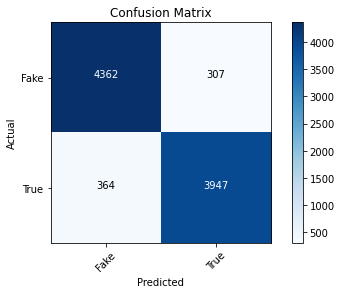

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Fake", "True"], rotation=45)
plt.yticks(tick_marks, ["Fake", "True"])

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression

# Create and train the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_logreg = logreg_model.predict(X_test)

print("Confusion Matrix for Logistic Regression:\n", confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logreg))

Confusion Matrix for Logistic Regression:
 [[4593   76]
 [  49 4262]]

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4669
           1       0.98      0.99      0.99      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



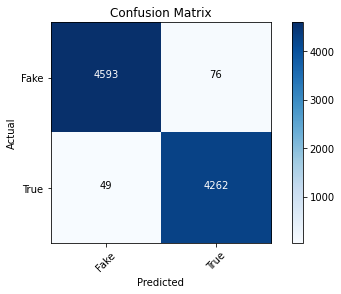

In [28]:
lgr_cm = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(6, 4))
plt.imshow(lgr_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Fake", "True"], rotation=45)
plt.yticks(tick_marks, ["Fake", "True"])

thresh = lgr_cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(lgr_cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [27]:
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

embedder = SentenceTransformer("all-MiniLM-L6-v2")

# 2‑ Your dataframe with text & label (already shuffled):
texts = data["text"].astype(str).tolist()
labels = data["label"].values

# 3‑ Create 384‑dim embeddings (CPU‑friendly)
embeddings = embedder.encode(
    texts, 
    batch_size=64, 
    show_progress_bar=True, 
    convert_to_numpy=True
)

# 4‑ Train / test split on the dense matrix
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(
    embeddings, labels, test_size=0.2, random_state=42
)
# C=1.0 is fine; use saga solver for multinomial logistic on dense data
emb_lr = LogisticRegression(max_iter=2000, solver="saga", n_jobs=-1)
emb_lr.fit(X_tr, y_tr)

y_pred = emb_lr.predict(X_te)
print("Confusion Matrix (MiniLM + LR):\n", confusion_matrix(y_te, y_pred))
print("\nClassification Report:\n", classification_report(y_te, y_pred))

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\Amech\anaconda3\lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Amech\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/702 [00:00<?, ?it/s]

Confusion Matrix (MiniLM + LR):
 [[4489  180]
 [ 150 4161]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      4669
           1       0.96      0.97      0.96      4311

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



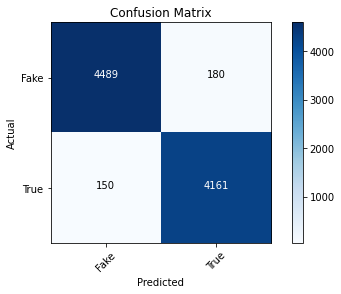

In [35]:
MiniLM_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.imshow(lgr_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Fake", "True"], rotation=45)
plt.yticks(tick_marks, ["Fake", "True"])

thresh = MiniLM_cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(MiniLM_cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [30]:
import os
os.makedirs("miniLM", exist_ok=True)
embedder.save("miniLM")       

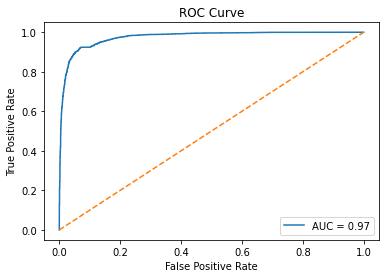

In [19]:
from sklearn.metrics import roc_curve, auc

y_proba = nb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [20]:
from collections import Counter
stemmer = PorterStemmer()
def most_common(text_series, top_n=20):
    # Combine all articles into one large string
    all_text = ' '.join(text_series.tolist())
    
    # Tokenize properly instead of just using .split()
    words = word_tokenize(all_text)
    
    # Filter stopwords and punctuation
    words = [word for word in words if word not in stop_words and word not in string.punctuation]
    
    # Apply stemming
    stemmed_words = [stemmer.stem(word) for word in words]
    
    # Count and return
    word_counts = Counter(stemmed_words)
    return word_counts.most_common(top_n)

In [21]:
true_words = most_common(true_csv['text'])
fake_words = most_common(fake_csv['text'])

print("True News Most Common Words: " , true_words)
print("Fake News Most Common Words: " , fake_words)

True News Most Common Words:  [('said', 99042), ('trump', 54373), ('u', 41177), ('state', 36647), ('would', 31525), ('reuter', 28404), ('presid', 28386), ('republican', 22114), ('govern', 20220), ('year', 19280), ('hous', 17529), ('new', 16787), ('unit', 16525), ('democrat', 16222), ('also', 15953), ('say', 15948), ('senat', 15707), ('elect', 15528), ('peopl', 15324), ('parti', 15005)]
Fake News Most Common Words:  [('trump', 74286), ('said', 31016), ('presid', 27947), ('peopl', 26054), ('one', 23752), ('state', 23721), ('would', 23427), ('u', 22353), ('like', 21412), ('say', 20522), ('clinton', 18652), ('go', 18146), ('time', 18070), ('obama', 18070), ('donald', 17219), ('republican', 16041), ('american', 16036), ('also', 15242), ('year', 15201), ('get', 15024)]


In [22]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()
class_labels = nb_model.classes_

top_true = np.argsort(nb_model.coef_[0])[-20:]
top_fake = np.argsort(nb_model.coef_[0])[:20]

print("Top words predicting TRUE:")
for i in reversed(top_true):
    print(feature_names[i])

print("\nTop words predicting FAKE:")
for i in top_fake:
    print(feature_names[i])

Top words predicting TRUE:
said
trump
reuters
state
president
would
republican
government
house
washington
party
united
year
minister
official
election
new
told
north
court

Top words predicting FAKE:
acr
belowfeatured
flickr
wfb
wiretv
cdata
somodevillagetty
subscribing
finicum
henningsen
filessupport
getty
wonggetty
illegals
fck
dyer
fuck
screengrab
dont
shit


C:\Users\Amech\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [31]:
import joblib
joblib.dump(logreg_model, 'lgr_fake_news_model.pkl')
joblib.dump(nb_model, "nb_fake_news_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl") 
joblib.dump(emb_lr, "miniLM_lr.pkl")

['miniLM_lr.pkl']

In [36]:
import gradio as gr
import joblib
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sentence_transformers import SentenceTransformer
import string

# Load saved models and vectorizer
lgr_model = joblib.load("lgr_fake_news_model.pkl")
nb_model = joblib.load("nb_fake_news_model.pkl")
emb_model = SentenceTransformer("miniLM")
emb_lr     = joblib.load("miniLM_lr.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Clean the input text
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))
    words = word_tokenize(text)
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

# Predict function
def predict_news(article_text, model_choice):
    cleaned = clean_text(article_text)
    vec = vectorizer.transform([cleaned])
    
    if model_choice == "Naive Bayes":
        model = nb_model
    elif model_choice == "Logistic Regression":
        model = lgr_model
    else:
        vec = emb_model.encode([article_text])
        model = emb_lr
    
    proba = model.predict_proba(vec)[0]
    prediction = model.predict(vec)[0]
    
    label = "True News ✅" if prediction == 1 else "Fake News ❌"
    confidence = proba[prediction] * 100

    return f"{label} ({confidence:.2f}% confidence)"

# Setting up the Gradio interface
interface = gr.Interface(
    fn=predict_news,
    inputs=[
        gr.Textbox(lines=10, placeholder="Paste your news article here..."),
        gr.Radio(["Naive Bayes", "Logistic Regression", "MiniLM + LogReg"], label="Select Model")
    ],
    outputs="text",
    title="Fake News Detector",
    description="Paste an article and choose a model: Naive Bayes, Logistic Regression, or MiniLM embeddings.",
)

interface.launch()

Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.
